In [10]:
from disaster import config
import numpy as np
import pandas as pd
import joblib

from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

timestr = '20200304175016'

In [11]:
# Load model
filename = (
    '{0}_model.joblib'
    .format(timestr)
    )

path = (
    '{0}/{1}'
    .format(
        config.models_path,
        filename
        )
    )
    
clf = joblib.load(path)

In [101]:
# Default based on Global Variable `timestr`
filename_fs = (
    '{0}_feature_selection.txt'
    .format(timestr)
    )

# Load features from file (skip first 2 rows)

path = (
    '{0}/{1}'
    .format(
        config.models_path,
        filename_fs
        )
    )

try:

    best_features = np.loadtxt(
        path,
        delimiter='\n',
        skiprows=2,
        dtype='str'
        )

except OSError:

    raise Exception('''
        Error: try passing a filename as parameter.\n
        Example: $ make metadata PARAMS=\"--filename_fs=\'...\'\"
        ''')

print('\n{0}'.format(best_features))
   
y_true = {}
y_pred = {}
proba = {}
x = {}
    
for s in ['train', 'valid']:
    
    print('\n==> {0}'.format(s.upper()))
    
    # Load data from file

    path = ('{0}/{1}.csv'.format(config.data_path, s))
    
    y_true[s] = pd.read_csv(path, usecols=['id', 'target'])

    y_true[s].set_index('id', inplace=True)

    y_true[s].sort_index(axis=0, inplace=True)

    # Load data from file

    path = ('{0}/{1}_features.csv'.format(config.data_path, s))

    x[s] = pd.read_csv(path)

    x[s].set_index('id', inplace=True)

    x[s].sort_index(axis=0, inplace=True)

    if s != 'train':
        for r in x['train'].columns:

            try:
                x[s][r]

            except KeyError:

                x[s][r] = 0
    
    thr = 0.5
    
    proba[s] = clf.predict_proba(x[s][best_features])[:,1]
    
    y_pred[s] = (proba[s] > thr).astype(int)
    
    print(classification_report(y_true[s], y_pred[s], output_dict=True))


['1' '7' 'abstorm' 'accident' 'africa' 'airplane' 'ameenshaikh3'
 'animalrescue' 'antioch' 'ap' 'aria_ahrary' 'arianagrande' 'armageddon'
 'artistsunited' 'bb17' 'best' 'beyhive' 'blowmandyup' 'breaking'
 'business' 'california' 'ccot' 'chemical' 'chile' 'claytonbryant' 'cool'
 'course' 'cowboys' 'crash' 'dance' 'dannyonpc' 'dependency'
 'diamondkesawn' 'directioners' 'disaster' 'djicemoon' 'dnb' 'drought'
 'dubstep' 'earthquake' 'ebay' 'edm' 'emmerdale' 'fashion' 'flood'
 'flooding' 'floods' 'foxnews' 'fukushima' 'genocide' 'gofundme' 'gop'
 'guillermo' 'hailstorm' 'handbag' 'hiring' 'hiroshima' 'hot' 'ices'
 'idfire' 'india' 'iran' 'irandeal' 'isis' 'itunes' 'itunesmusic' 'japan'
 'japì_n' 'job' 'jobs' 'justinbieber' 'kindle' 'listen' 'manchester'
 'mayhem' 'mh370' 'michael5sos' 'military' 'mnpdnashville' 'models'
 'mumbai' 'myanmar' 'news' 'newyork' 'nickcannon' 'none_at' 'none_hash'
 'none_url' 'nowplaying' 'nsfw' 'nuclear' 'okwx' 'pakistan' 'phoenix'
 'photography' 'pmharper' 'po

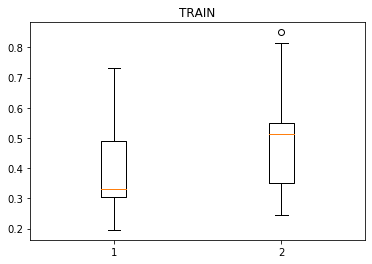

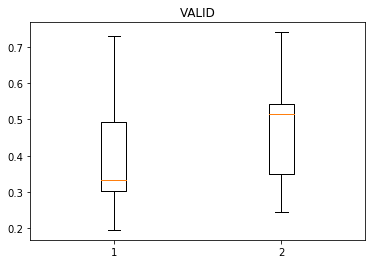

In [103]:
for s in ['train', 'valid']:
    
    fig1, ax = plt.subplots()
    
    ax.set_title(s.upper())
    
    mask_0 = (y_true[s]['target'].values == 0)
    mask_1 = (y_true[s]['target'].values == 1)
    
    proba_0 = pd.Series(proba[s])[mask_0].values
    proba_1 = pd.Series(proba[s])[mask_1].values
    
    ax.boxplot([proba_0, proba_1])

    plt.show()